<a href="https://colab.research.google.com/github/igt14/Financial-Inclusion-EDA/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_09_Ian_Gathumbi_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the question


a.) Specifying the question

What are the factors that can determine which individuals are most likely to have or use a bank account?


b.)  Defining the Metric for Success

For bivariate analysis involving bank account access vs a numerical variable, passing the t test

For multi-variate analysis, an algorithm with an accuracy greater than 80%

c.) Understanding the context

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

d.)  Recording the Experimental Design

e.) Selecting the data
The main dataset contains demographic information and what financial services are used by individuals across East Africa. This data was extracted from various Finscope surveys ranging from 2016 to 2018, and more information about these surveys can be found here:

* FinAccess Kenya 2018 : https://fsdkenya.org/publication/finaccess2019/
* Finscope Rwanda 2016 : http://www.statistics.gov.rw/publication/finscope-rwanda-2016
* Finscope Tanzania 2017 : http://www.fsdt.or.tz/finscope/
* Finscope Uganda 2018 : http://fsduganda.or.ug/finscope-2018-survey-report/

Dataset Files:

* Variable Definitions: http://bit.ly/VariableDefinitions
* Dataset: http://bit.ly/FinancialDataset

# 2. Loading our data

In [1]:
# Importing the libraries that we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data from the source 
# Dataset url = http://bit.ly/FinancialDataset

fin = pd.read_csv('http://bit.ly/FinancialDataset')

# 3. Checking the data

In [3]:
# Determining the no. of records in our dataset
fin.shape

(23524, 13)

In [4]:
# Checking whether each column has an appropriate datatype
fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [5]:
# Previewing the top of our dataset
fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [6]:
# Previewing the bottom of our datasest
fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


# 4. Cleaning the data

a.) Dealing with anomalies/outliers

In [7]:
# The countries in our dataset should be [Kenya, Rwanda, Tanzania, Uganda]
fin['country'].unique()

# They are ok

array(['Kenya', 'Rwanda', 'Tanzania', nan, 'Uganda'], dtype=object)

In [8]:
# The years in our dataset should be [2018, 2017, 2016]
fin['year'].unique()

array([2018, 2029, 2056, 2016, 2039, 2017])

In [9]:
# There are unexpected years 2029, 2056 amd 2039 
fin[(fin['year'] == 2029) | (fin['year'] == 2056) | (fin['year'] == 2039)]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
213,Kenya,2029,uniqueid_214,No,Urban,Yes,6.0,16.0,Male,Other relative,Single/Never Married,Secondary education,Remittance Dependent
308,Kenya,2056,uniqueid_309,Yes,Urban,Yes,4.0,40.0,Male,Head of Household,Married/Living together,Tertiary education,Formally employed Private
7014,Rwanda,2039,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [10]:
# Since the Kenyan survey was done in 2018 and Rwandan in 2016 we can correct the anomalies
fin.iloc[213, 1] = 2018
fin.iloc[308, 1] = 2018
fin.iloc[7014, 1] = 2016

In [11]:
# To see if it worked
fin['year'].unique()

array([2018, 2016, 2017])

In [12]:
# Has a bank account should be yes or no
fin['Has a Bank account'].unique()

array(['Yes', 'No', nan], dtype=object)

In [13]:
# Type of location - rural or urban
fin['Type of Location'].unique()

array(['Rural', 'Urban', nan], dtype=object)

In [14]:
# Cell Phone Access - yes or no
fin['Cell Phone Access'].unique()

array(['Yes', 'No', nan], dtype=object)

In [15]:
# gender_of_respondent - male or female
fin['gender_of_respondent'].unique()

array(['Female', 'Male', nan], dtype=object)

In [16]:
# The relathip with head - Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know
fin['The relathip with head'].unique()

# We will assume that the nan values are "Don't know" which we will fill when dealing with missing values

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives', nan], dtype=object)

In [17]:
# marital_status - Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don't know
fin['marital_status'].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know', nan], dtype=object)

In [18]:
# Level of Educuation -  No formal education, Primary education, Secondary education, Vocational/Specialised training, Tertiary education, Other/Dont know/RTA
fin['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', '6', nan],
      dtype=object)

In [19]:
# There is an unexpected category '6' which we shall assume is class 6 meaning the highest level of education is primary
#
# Making a list of indices with level of education as '6'
x = list(fin[fin['Level of Educuation'] == '6'].index.values)

# Correcting '6' to 'Primary education'
for a in x:
  fin.iloc[a, 11] = 'Primary education'

In [20]:
# To see if it worked
fin['Level of Educuation'].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA', nan], dtype=object)

In [21]:
# Type of Job - Farming and Fishing, Self employed, Formally employed Government, Formally employed Private, Informally employed,
# Remittance Dependent, Government Dependent, Other Income, No Income, Dont Know/Refuse to answer
fin['Type of Job'].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', nan, 'No Income'], dtype=object)

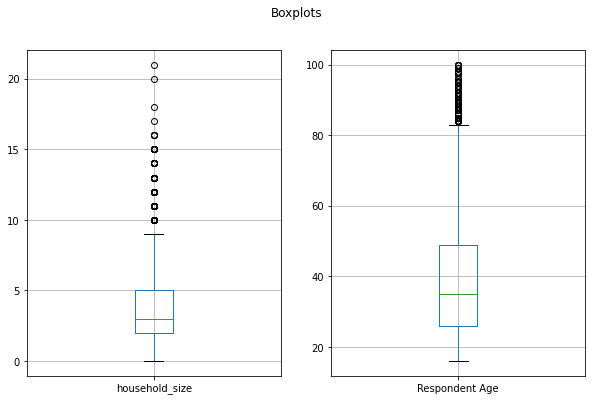

In [22]:
# We will use box plots to spot anomalies/outliers in household_size and Respondent Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 6))
fig.suptitle("Boxplots")
fin.boxplot(['household_size'], ax=ax1)
fin.boxplot(['Respondent Age'], ax=ax2)
plt.show()

# The outliers are not outrageous therefore there are no anomalies in household_size and Respondent Age

b.) Dealing with missing values

In [23]:
# Checking if there are missing values
fin.isnull().any()

country                    True
year                      False
uniqueid                  False
Has a Bank account         True
Type of Location           True
Cell Phone Access          True
household_size             True
Respondent Age             True
gender_of_respondent       True
The relathip with head     True
marital_status             True
Level of Educuation        True
Type of Job                True
dtype: bool

In [24]:
# As mentioned earlier we will fill nan values in relathip with head as "Don't know"
fin['The relathip with head'].fillna("Don't know", inplace = True)

In [25]:
# To see if it worked
fin['The relathip with head'].isnull().any()

False

In [26]:
# We will need complete data for all the columns so we will drop the rest of the records with nan values
fin.dropna(axis = 0, how = 'any', inplace = True)

# Determining the no. of records in our dataset
fin.shape

(23343, 13)

c.) Dealing with duplicates

In [27]:
# Checking for duplicated records
fin.duplicated().any()

False

# Implementing the Solution

## a.) Univariate Analysis

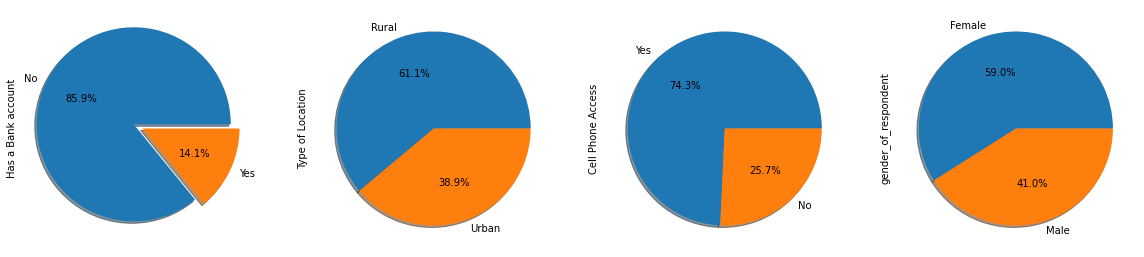

In [28]:
# Creating pie charts to visualize their distribution per category
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20,20))
fin['Has a Bank account'].value_counts().plot(kind = 'pie', explode = (0.1,0), autopct='%1.1f%%', shadow=True, ax = ax1)
fin['Type of Location'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', shadow=True, ax = ax2)
fin['Cell Phone Access'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', shadow=True, ax = ax3)
fin['gender_of_respondent'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', shadow=True, ax = ax4)
plt.show()

From the pie charts above:
* Only 14.1% of our respondents have bank accounts
* Most of repondents are in rural locations (61.1%) as opposed to urban (38.9%)
* About a quarter of our respondents have access to cell phones
* 59% of our respondents are female and males 41%

In [29]:
# Creating a function for setting a title, xlabel and ylabel
def chart_elements(title, xlabel, ylabel):
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  return plt.show()

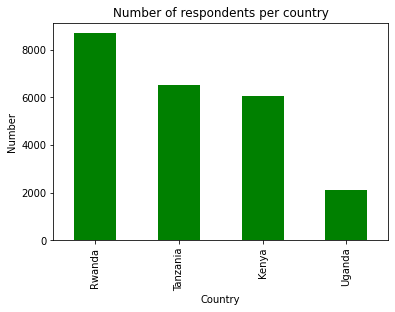

In [30]:
# Plotting a bar chart to show the number of our respondents by country
fin['country'].value_counts().plot(kind = 'bar', color = 'green')
chart_elements('Number of respondents per country', 'Country', 'Number')

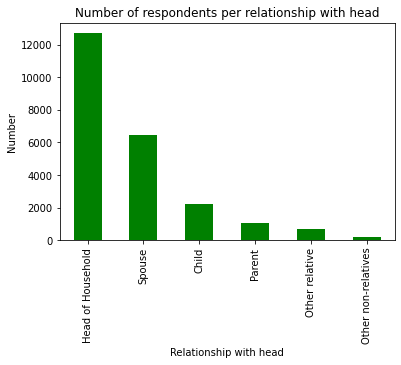

In [31]:
# Plotting a bar chart to show the number of our respondents by relationship with head
fin['The relathip with head'].value_counts().plot(kind = 'bar', color = 'green')
chart_elements('Number of respondents per relationship with head', 'Relationship with head', 'Number')

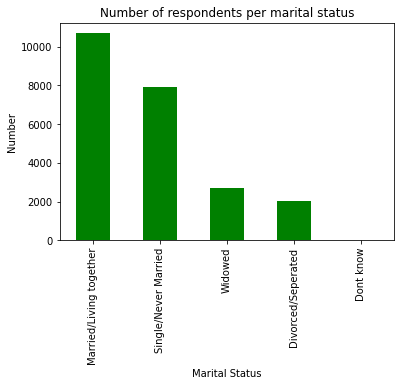

In [32]:
# Plotting a bar chart to show the number of our respondents by marital status
fin['marital_status'].value_counts().plot(kind = 'bar', color = 'green')
chart_elements('Number of respondents per marital status', 'Marital Status', 'Number')

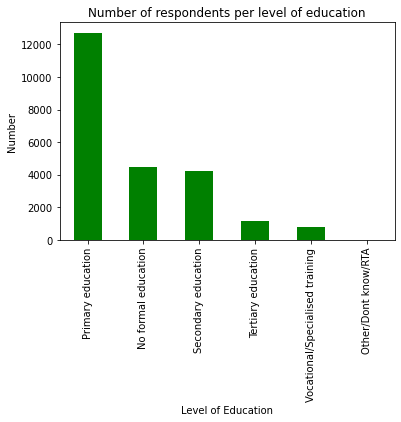

In [33]:
# Plotting a bar chart to show the number of our respondents by level of education
fin['Level of Educuation'].value_counts().plot(kind = 'bar', color = 'green')
chart_elements('Number of respondents per level of education', 'Level of Education', 'Number')

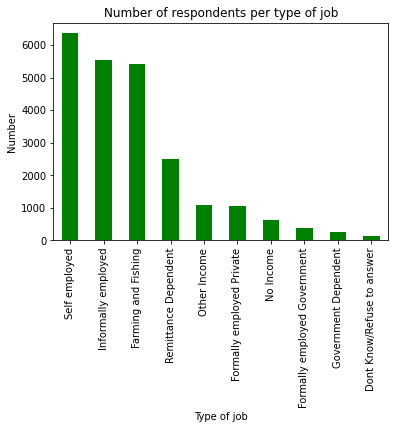

In [34]:
# Plotting a bar chart to show the number of our respondents by type of job
fin['Type of Job'].value_counts().plot(kind = 'bar', color = 'green')
chart_elements('Number of respondents per type of job', 'Type of job', 'Number')

[]

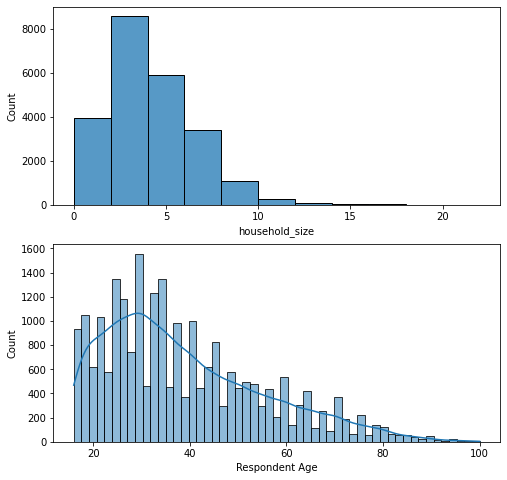

In [35]:
# Creating a histogram to see the distribution of respondents age and income
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (8,8))
sns.histplot(fin, x="household_size", bins = (0,2,4,6,8,10,12,14,16,18,20,22), ax = ax1)
sns.histplot(fin, x="Respondent Age", kde=True, ax = ax2)
plt.plot()

In [76]:
# Descriptive statistics
fin[['household_size','Respondent Age']].describe()

,household_size,Respondent Age
count,23343.000000,23343.000000
mean,3.688643,38.805509
std,2.281184,16.519803
min,0.000000,16.000000
25%,2.000000,26.000000
50%,3.000000,35.000000
75%,5.000000,49.000000
max,21.000000,100.000000


## b.) Bivariate Analysis

Q1: What is the relationship between having a bank account and the country you come from?

In [36]:
# We will create a stacked column to find out
# We need to create a new dataframe with the information we want in a form that we can visualize
# First let us separate our dataset into two groups: those with bank accounts and those without
yes = fin[fin['Has a Bank account'] == 'Yes']
no = fin[fin['Has a Bank account'] == 'No']

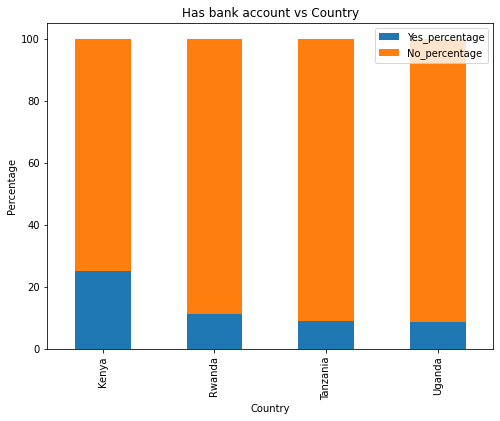

In [42]:
# Grouping the two groups by country to find out the number of people with and without bank accounts
country_yes = yes.groupby('country').count()['Has a Bank account'].to_frame().reset_index()
country_no = no.groupby('country').count()['Has a Bank account'].to_frame().reset_index()
#
# Merging the datasets to create our required dataframe
country_merge = country_yes.merge(country_no, on = "country", how = "inner")
#
# Changing the column names
country_merge.columns = ['Country', 'Yes', 'No']
#
# Creating a new column for total
country_merge['Total'] = country_merge['Yes'] + country_merge['No']
#
# Creating new columns for percentage yes or no
country_merge['Yes_percentage'] = (country_merge['Yes'] / country_merge['Total']) * 100
country_merge['No_percentage'] = (country_merge['No'] / country_merge['Total']) * 100

# Setting 'Country' as our index to make visualization easier
country_merge.set_index('Country', inplace = True)

# Plotting our stacked bar chart
country_merge[['Yes_percentage', 'No_percentage']].plot(kind = 'bar', stacked = True, figsize = (8,6))
chart_elements('Has bank account vs Country', 'Country', 'Percentage')

Interpretation: Kenya has the largest proportion of people with bank accounts compared to the other countries

Q2: What about location type?

In [43]:
# Creating a function since we will follow the same procedure with other categorical variables
def stacked(column):
  # Grouping the two groups by "column" to find out the number of people with and without bank accounts
  df_yes = yes.groupby(column).count()['Has a Bank account'].to_frame().reset_index()
  df_no = no.groupby(column).count()['Has a Bank account'].to_frame().reset_index()
  
  # Merging the datasets to create our required dataframe
  df_merge = df_yes.merge(df_no, on = column, how = "inner")

  #Changing the column names
  df_merge.columns = [column, 'Yes', 'No']
  #
  # Creating a new column for total
  df_merge['Total'] = df_merge['Yes'] + df_merge['No']
  #
  # Creating new columns for percentage yes or no
  df_merge['Yes_percentage'] = (df_merge['Yes'] / df_merge['Total']) * 100
  df_merge['No_percentage'] = (df_merge['No'] / df_merge['Total']) * 100

  # Setting 'Country' as our index to make visualization easier
  df_merge.set_index(column, inplace = True)
  
  # Plotting our stacked bar chart
  df_merge[['Yes_percentage', 'No_percentage']].plot(kind = 'bar', stacked = True, figsize = (8,6))
  chart_elements('Has a bank account vs ' + column, column, "Percentage")
  return plt.show()

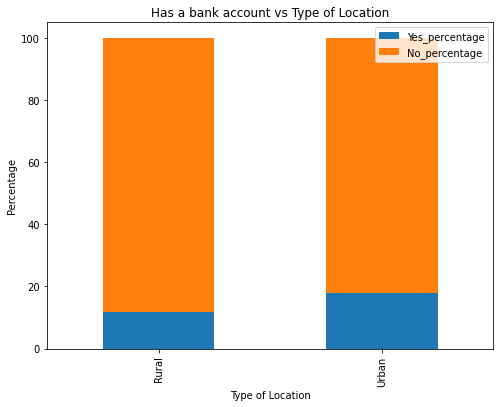

In [44]:
# Using our function to create a stacked bar chart
stacked('Type of Location')

Interpretation : Urban areas have a slightly larger proportion of people with bank accounts compared to rural areas

Q3: Cell phone access? 

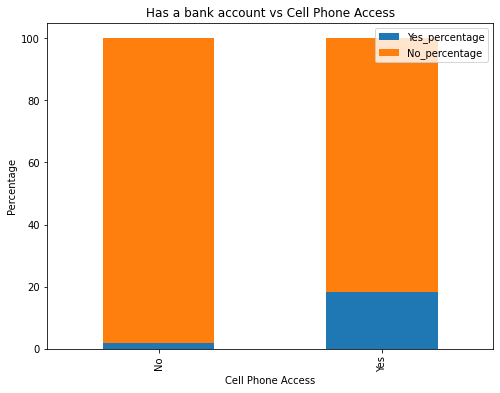

In [45]:
stacked('Cell Phone Access')

Interpretation : Respondents with cell phone access have a higher percentage of people with a bank account compared to those without internet access

Q4: What about gender?

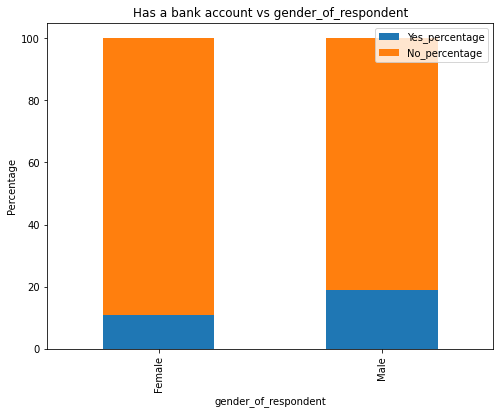

In [46]:
stacked('gender_of_respondent')

Interpretation: Males have a higher percentage of people with bank accounts than females

Q5: Relationship with the head of family?

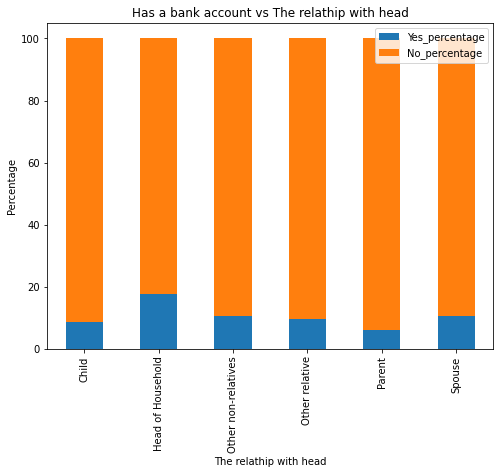

In [47]:
stacked('The relathip with head')

Interpretation: Heads of household have a greater share of people with bank accounts compared to the others

Q6: Marital status?

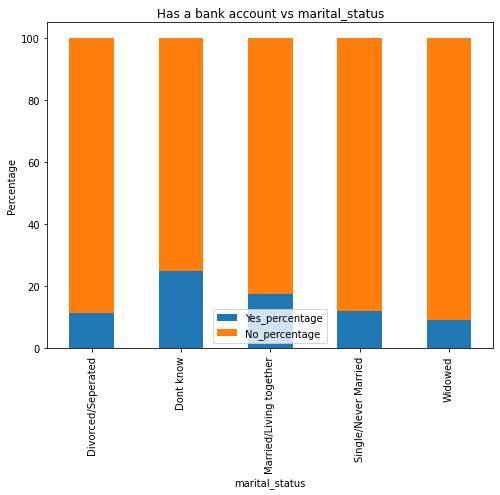

In [48]:
stacked('marital_status')

Interpretation: A slightly greater proportion of people who don't know their marital status have access to bank accounts compared to others

Q7: Level of education

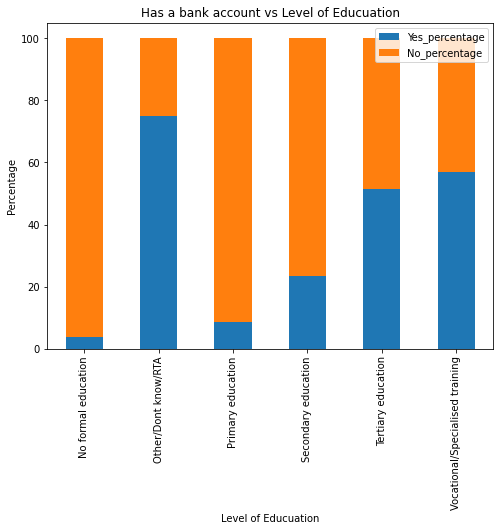

In [49]:
stacked('Level of Educuation')

Interpretation: A greater proportion of respondets with bank accounts have post secondary education

Q8: Type of job?

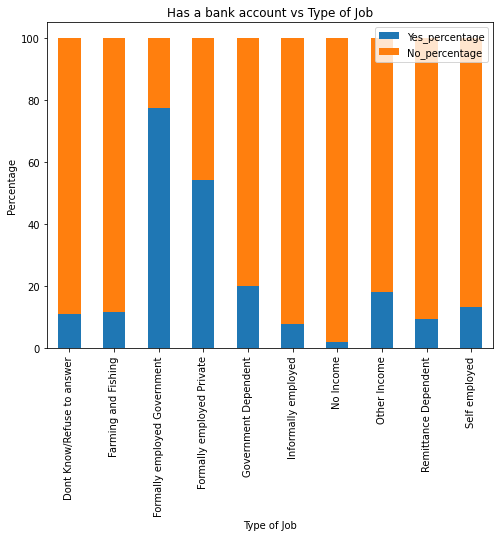

In [50]:
stacked('Type of Job')

Interpretation: A greater percentange of respondents that have bank accounts are formally employed by government compared to other job types

Q9 : Can age determine if one has acccess to a bank account or not?

In [51]:
# We will used the two datasets we split by access yo bank account
# Looking at the shape of our two groups
print(yes.shape, no.shape)

(3297, 13) (20046, 13)


In [52]:
# As shown above the number of people without bank accounts are more than those with bank accounts
# This might affect our analysis so we will draw a random sample of 2500 people from each group and use them 
yes_sample = yes.sample(n = 2500)
no_sample = no.sample(n = 2500)

In [54]:
# Let us find out the average age of people with bank accounts and people without bank accounts
yes_sample['Respondent Age'].mean()
#
# The average age of people with bank accounts is 39.5
#
no_sample['Respondent Age'].mean()
#
# The average age of people without bank accounts is 38.8

38.8572

So we could conclude that younger people are less likely to have bank accounts than older people but is this difference in age statistically significant?

We will conduct a independent t-test to find out.

Before the t-test can be conducted, the assumptions of the t-test need 
to be checked to see if the t-test results can be trusted. The data which we will use must meet those assumptions in order for the test results to be valid.
1. The samples are independently and randomly drawn
2. The distribution of the residuals between the two groups should follow the normal distribution
3. The variances between the two groups are equal

If any of these assumptions are violated then another test should be used.

In [55]:
# Assumption one was met when we selected random samples from our dataframe
# To test asummption two first we calculate the residuals between the groups 
# by subtracting the values of one group from the values of the other group.
# 
# Resetting indices to avoid null values
yes_sample = yes_sample.reset_index()
no_sample = no_sample.reset_index()

# Finding our residuals
diff = yes_sample['Respondent Age'] - no_sample['Respondent Age']

# We use the shapiro test to test whether the distribution of the residuals between the two groups follow the normal distribution
# Null hypothesis : the data was drawn from a normal distribution.
from scipy import stats
stats.shapiro(diff)

# The p value is less than 0.05 therefore we reject the null hypothesis and conclude that our residuals are not normally distributed

(0.9986451268196106, 0.04129895567893982)

Our sample failed one of the assumptions for a t test therefore we cannot tell if age is a significant factor in explaining whether someone has a bank account or not

Q9: Household size?

In [60]:
# We will use the sample groups created earlier
# What is average household size of respondents with a bank account?
yes_sample['household_size'].mean()
#
# It is 4 (3.5392)
# What is average household size of respondents without a bank account?
no_sample['household_size'].mean()
#
# It is also 4 (3.6432)

3.6432

We could say that people with larger households are less likely to have a bank account.

To test this we can conduct a independent t test as well but first we have to test that the assumptions have been met.

In [64]:
# Assumption one was met when we selected random samples from our dataframe
# To test asummption two first we calculate the residuals between the groups 
# by subtracting the values of one group from the values of the other group.
#
# Finding our residuals
diff1 = yes_sample['household_size'] - no_sample['household_size']

# We use the shapiro test to test whether the distribution of the residuals between the two groups follow the normal distribution
# Null hypothesis : the data was drawn from a normal distribution.
#
stats.shapiro(diff1)

# The p value is less than 0.05 therefore we reject the null hypothesis and conclude that our residuals are not normally distributed

(0.9793738722801208, 1.4167556621017295e-18)

Our sample failed one of the assumptions for a t test therefore we cannot tell if household size is a significant factor in explaining whether someone has a bank account or not

## c.) Multivariate Analysis
We will use use discriminant analysis since our dependent variable "Has access to Bank account" is categorical

In [65]:
# Dividing our dataset into features and corresponding labels
X = fin.iloc[:, 6:8].values
y = fin.iloc[:, 3:4].values

In [66]:
# Dividing the resultant dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
# Performing feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
# Let us first perform LDA with one component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train1 = lda.fit_transform(X_train, y_train.ravel())
X_test1 = lda.transform(X_test)

In [69]:
# 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train1, y_train.ravel())
y_pred = classifier.predict(X_test1)

In [70]:
# Evaluating the performance of our algorithm using a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy is ' + str(accuracy_score(y_test, y_pred)))

[[4008    0]
 [ 661    0]]
Accuracy is 0.8584279288926965


Our algorithim predicted whether our respondents have a bank account or not with 85% accuracy which meets our success criteria we set earlier

# Challenging the solution

# Follow up questions

a.) Did we have the right data? Yes

b.) Do we need other data to answer our question? No

c.) Did we have the right question? Yes